FP16 :[3.82223341e-07 4.79153513e-07 1.04455360e-06 1.46389432e-06
 1.67380216e-06 1.68436398e-06 1.67146952e-06 1.88487843e-06
 1.57456167e-06 1.35856153e-06 9.02492456e-07 5.68654987e-07
 4.06627461e-07 5.53157836e-02 1.29824644e+02]
FP32 :[5.68623905e-14 1.32795209e-13 1.53548273e-13 1.39530740e-13
 1.46431515e-13 1.59500979e-13 1.69464378e-13 1.57502373e-13
 1.62369246e-13 1.70649144e-13 1.63869929e-13 1.66575996e-13
 1.66102892e-13 1.66003180e-13 1.65673352e-13]
FX16 :[1.27822272e-07 2.23464852e-07 4.12060955e-07 4.58747819e-07
 5.23874996e-07 4.89860152e-07 5.12400319e-07 4.99563559e-07
 5.11124113e-07 5.13858991e-07 5.15944307e-07 5.19892956e-07
 5.17361253e-07 5.09040889e-07 5.32787470e-07]
FX24 :[2.48179678e-12 4.74554484e-12 8.36107174e-12 7.91125415e-12
 9.77558610e-12 9.00243127e-12 8.91426643e-12 8.66860706e-12
 8.47274848e-12 8.20371467e-12 8.13486690e-12 7.93579640e-12
 7.88731743e-12 7.82575211e-12 7.79842141e-12]
FX32 :[5.68623905e-14 1.32795209e-13 1.49427595e-13 1.39

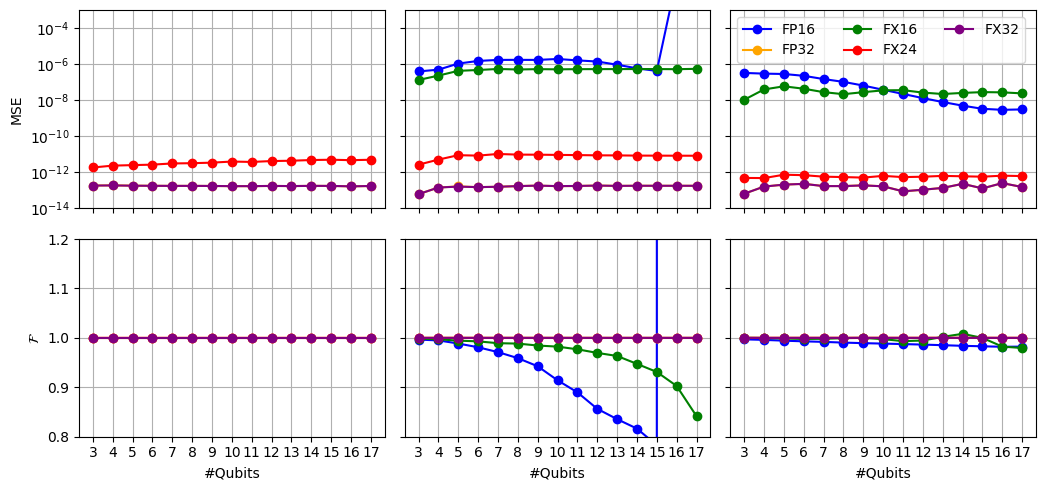

In [67]:
import os
from collections import defaultdict
import numpy as np
hardware_platforms = ["FP16", "FP32", "FX16", "FX24", "FX32"]

qubits = range(3, 18)  # Qubit range from 3 to 17 (15 lines)
depths = range(1, 11)  # Assuming depth ranges from 1 to 10 for qrc
colors = {
    'FP16': 'blue',
    'FP32': 'orange',
    'FX16': 'green',
    'FX24': 'red',
    'FX32': 'purple',
}

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(11, 5))


for platform in ['FP32', 'FX24', 'FX32']:
    msess = []
    for trial in range(1, 101):
        mse_file = f"../mse/qrc/{platform}/{trial}/qrc_depth_10_MSE.txt"
        mses = np.loadtxt(mse_file)
        msess.append(mses)
    mses = np.array(mses)
    mses = np.mean(msess, axis=0)
    axs[0, 0].plot(qubits, mses, '-o', color = colors[platform], label=platform)


for platform in hardware_platforms:
    mse_file = f"../mse/qft/qft_{platform}_MSE.txt"
    mses = np.loadtxt(mse_file)
    axs[0, 1].plot(qubits, mses, '-o', color = colors[platform], label=platform)


    print(f"{platform} :{mses}")
    
    mse_file = f"../mse/psr/psr_{platform}_MSE.txt"
    mses = np.loadtxt(mse_file)
    axs[0, 2].plot(qubits, mses, '-o', color = colors[platform], label=platform)


for platform in ['FP32', 'FX24', 'FX32']:
    msess = []
    for trial in range(1, 101):
        mse_file = f"../fidelity/qrc/{platform}/{trial}/qrc__10depth_Fidelity.txt"
        mses = np.loadtxt(mse_file)
        msess.append(mses)
    mses = np.array(mses)
    mses = np.mean(msess, axis=0)
    axs[1, 0].plot(qubits, mses, '-o', color = colors[platform], label=platform)



for platform in hardware_platforms:
    fidelity_file = f"../fidelity/qft/qft_{platform}_Fidelity.txt"
    mses = np.loadtxt(fidelity_file)
    axs[1, 1].plot(qubits, mses, '-o', color = colors[platform], label=platform)

    
    fidelity_file = f"../fidelity/psr/psr_{platform}_Fidelity.txt"
    mses = np.loadtxt(fidelity_file)
    axs[1, 2].plot(qubits, mses, '-o', color = colors[platform], label=platform)
      
    
for j in range(3):
    for i in range(2):
        if i == 0:
            axs[i, j].set_yscale('log')  
        axs[i, j].grid()
        axs[i, j].set_xticks(qubits)
        axs[i, j].set_xticklabels([])

axs[0, 0].set_ylabel('MSE')
axs[1, 0].set_ylabel(r'$\mathcal{F}$')
axs[0, 2].legend(loc='upper left', ncols = 3)
for i in range(3):
    axs[1, i].set_xticklabels(qubits)
    axs[1, i].set_xlabel('#Qubits')
    axs[1, i].set_ylim(0.8, 1.2)
    axs[0, i].set_ylim(10**(-14), 10**(-3))

for i in range(2):
    for j in range(1,3):
        axs[i, j].set_yticklabels([])
# if app == 'qrc':
#     mse_file = f"../mse//{app}/{platform}/10/qrc_depth_10_MSE.txt"
plt.tight_layout()
#plt.savefig('../images/mse_and_fidelity_for_3.svg')